 # @ EDA : Exploratory Data Analysis

  - why? --> we exploring the data
  - we don't know anything about the data and we are still trying to explore it and understanding it by using simple statistics,mathematics and plotting tools.
  
# 1. univariate analysis
  - performing the analysis on single column
  - ex : histogram,kde,distribution,check gaussian or not,cdf etc

# 2. bivariate analysis
  - performing the analysis on two columns
  - different types of plots-->scatter plot,correlation
    
# 3. multivariate analysis 
  - iris-->4features-->SL,SW,PL,PW-->4C2-->6
  - pairplot
  - correlation matrix
  - 3D scatter-->difficult to visualize
  - dimensionalty reduction---PCA,t-SN
  1. univariate : histogram,kde,distribution

      CDF-->observation
  3. bivariate : scatter plot,pair plot
  4. distplot ---> hue-survival

# @ EDA
  1. histogram
  2. boxplot
  3. countplot
  4. distribution
  5. displot,CDF

  - bivariate analysis :
  1. scatter plot
  2. barplot
  3. hypothesis testing

  - multivariate analysis :
  1. pairplot
  2. haetmap
  3. Dimensionality reduction

  - pca
  - tsne
  - T-SNE:t distributed stochastic neighbor encoding

# @ Steps to Perform EDA
  step : 1
  - knowing the dataset
  step : 2
  - isnull()
  - isduplicated()
  - price--->missing value:
  - 150 values---->4-5 values missing
    1. distplot()
    2. KDE
    3. describe()
  - mean ---> outliers
  - sd --->
  - variance --->
  - median : which is not influenced by outliers
  - MAD :
     - GD --->
  step : 3
  - how to check the outliers :
  1. visualize --> boxplot
  2. scatter plot :
       - h=[167,166,158,266]
       - w=[67,59,78,200]
  3. IQR : inter quartile range
      - min-----25th---50th---75th----max
-      Q1   Q2    Q3
-         median
  - IQR=75th-25th-Q3-Q1
     - Thumb rule ---> boxplot --->
     - LB=Q1-(1.5*IQR)
     - UB=Q3+(1.5*IQR) ---> statician found out
         - if any value<LB
         - if any value>UB ----> outliers
              1. outlier detection
              2. removal of outliers
         - any valuereplace that value with LB
         - any value>UB---->replace that value with UB
   - if the distribution is skewed-->IQR
   - if the distribution is gaussian-->Z-score
   - for a standard/regular data-->1.5*IQR
        - very noisy data---->2*IQR
        - extreme outliers--->3*IQR
     
# @ empirical properties :
  - value<(mean-3sig)
  - value>(mean+3sig)
    
# ordinal : mode
# @ Z score method :
  - z_score=data-mean(data)/sd(data)
  - threshold=3
  - z_score>3
  - z_score<-3----> there are outliers

# Q when the distribution is gaussian?

  - from scipy.stats import zscore
  - 40 columns---->
  - np.where
  - 6-7 column dataset-->one time
  - isolation forest   

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [9]:
df=pd.read_csv("D:\\Download\\iris.csv")
df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [10]:
df.shape

(150, 5)

In [11]:
df.columns

Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width',
       'variety'],
      dtype='object')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [13]:
df.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [14]:
df["variety"].value_counts()

variety
Setosa        50
Versicolor    50
Virginica     50
Name: count, dtype: int64

In [15]:
df["sepal.length"]

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal.length, Length: 150, dtype: float64

<Axes: xlabel='sepal.length', ylabel='Count'>

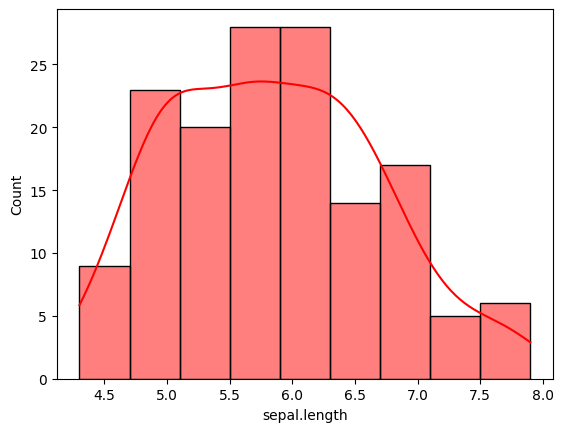

In [16]:
sns.histplot(df["sepal.length"],kde=True,color='red')

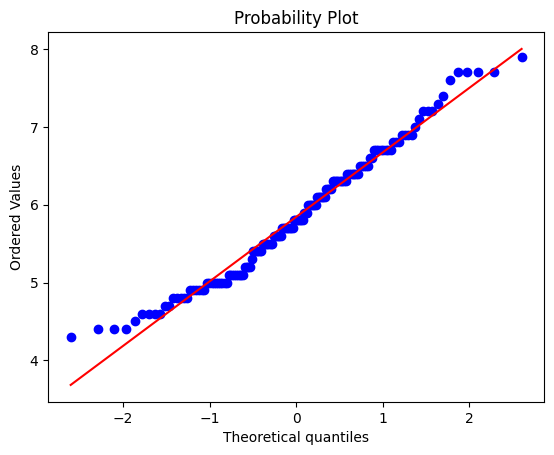

In [17]:
stats.probplot(df["sepal.length"],dist='norm',plot=plt)
plt.show()

<Axes: xlabel='sepal.length', ylabel='Density'>

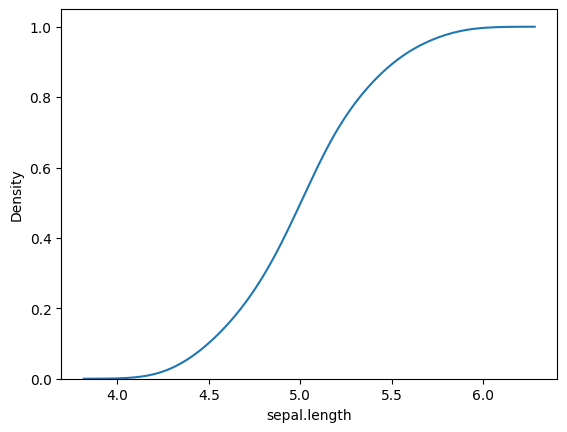

In [18]:
sns.kdeplot(data=df[df["variety"]=="Setosa"],x='sepal.length',cumulative=True,label='Setosa')

In [19]:
df["petal.length"]

0      1.4
1      1.4
2      1.3
3      1.5
4      1.4
      ... 
145    5.2
146    5.0
147    5.2
148    5.4
149    5.1
Name: petal.length, Length: 150, dtype: float64

<Axes: xlabel='petal.length', ylabel='Count'>

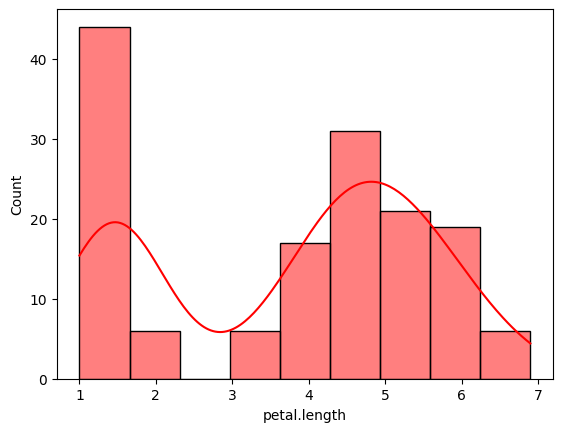

In [20]:
sns.histplot(df["petal.length"],kde=True,color='red')

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [22]:
df=pd.read_csv("D:\\Download\\archive (3).zip")
df

,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1
...,...,...,...,...
300,75,62,1,1
301,76,67,0,1
302,77,65,3,1
303,78,65,1,2


In [23]:
df.shape

(305, 4)

In [24]:
df.columns

Index(['30', '64', '1', '1.1'], dtype='object')

In [25]:
df.columns=["Age","operation_year","aux_nodes","Survival status"]
df.columns

Index(['Age', 'operation_year', 'aux_nodes', 'Survival status'], dtype='object')

In [26]:
df.head()

,Age,operation_year,aux_nodes,Survival status
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              305 non-null    int64
 1   operation_year   305 non-null    int64
 2   aux_nodes        305 non-null    int64
 3   Survival status  305 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [28]:
df["Survival status"]

0      1
1      1
2      1
3      1
4      1
      ..
300    1
301    1
302    1
303    2
304    2
Name: Survival status, Length: 305, dtype: int64

In [29]:
#how many patients are suvived and how many patients are died
df["Survival status"].value_counts()

Survival status
1    224
2     81
Name: count, dtype: int64

In [30]:
#checking null value
df.isnull().sum()

Age                0
operation_year     0
aux_nodes          0
Survival status    0
dtype: int64

In [31]:
df.describe()

,Age,operation_year,aux_nodes,Survival status
count,305.000000,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066,1.265574
std,10.744024,3.254078,7.199370,0.442364
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,61.000000,66.000000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [32]:
df.columns

Index(['Age', 'operation_year', 'aux_nodes', 'Survival status'], dtype='object')

<Axes: xlabel='Age', ylabel='Count'>

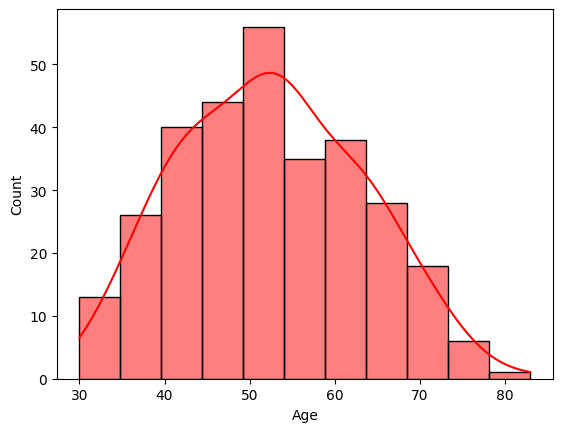

In [33]:
sns.histplot(df['Age'],kde=True,color='red')

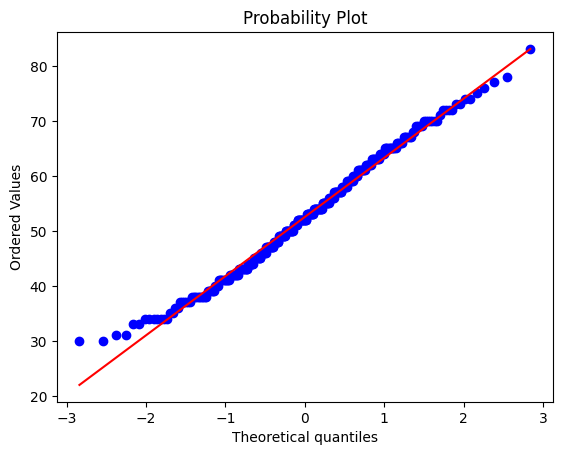

In [34]:
stats.probplot(df['Age'],dist='norm',plot=plt)
plt.show()

In [35]:
df.columns

Index(['Age', 'operation_year', 'aux_nodes', 'Survival status'], dtype='object')

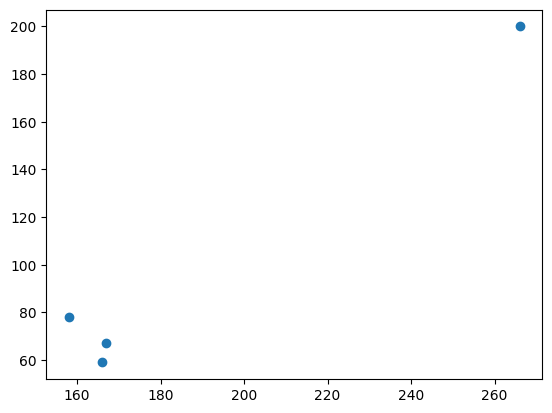

In [36]:
h=np.array([167,166,158,266])
w=np.array([67,59,78,200])
plt.scatter(h,w)
plt.show()

In [37]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
df=pd.read_csv("D:\\Download\\Bengaluru_House_Data.csv")
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


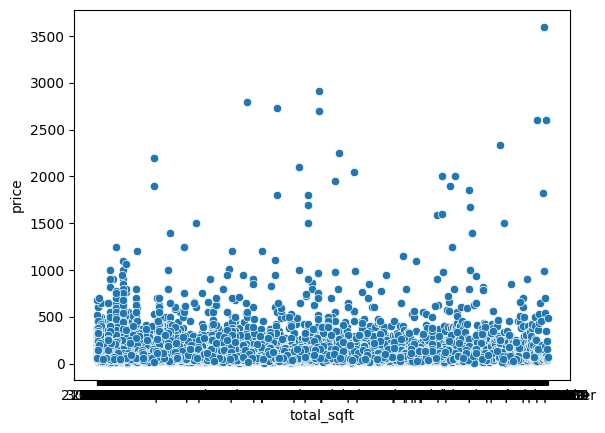

In [39]:
sns.scatterplot(df,x=df["total_sqft"],y=df["price"])
plt.show()

In [40]:
# IQR: Inter Quartile range
df["price"]

0         39.07
1        120.00
2         62.00
3         95.00
4         51.00
          ...  
13315    231.00
13316    400.00
13317     60.00
13318    488.00
13319     17.00
Name: price, Length: 13320, dtype: float64

C:\Users\Komal prakash mali\AppData\Local\Temp\ipykernel_7924\50337492.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["price"])


<Axes: xlabel='price', ylabel='Density'>

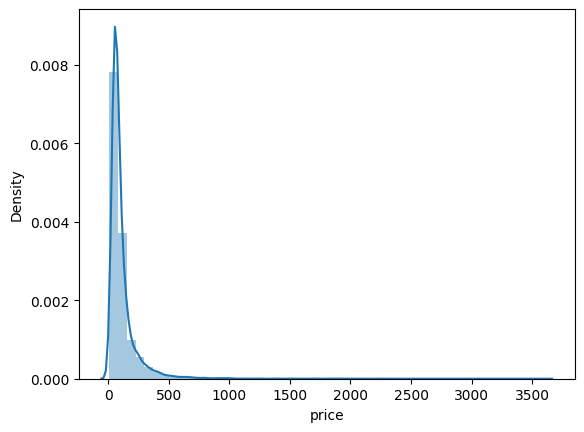

In [41]:
sns.distplot(df["price"])